### Prototyping the Analysis Pipeline for the Predicting 5-year Survivability of Colorectal Cancer Patients

_Write in this notebook all the stages required to prototype your data analysis pipeline according to the project instructions._

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
import shap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Do your analysis from here...

# Take advantage of jupyter notebooks from previous courses! (DSHI?😉)

## Colorectal Cancer Dataset

### Dataset

The *Colorectal Cancer Global Dataset & Predictions* is a comprehensive dataset containing demographic, clinical, lifestyle, and treatment-related features relevant to colorectal cancer (CRC). It concists of 16749 rows and combines 6 numerical features with 22 categorical features, making it suitable for descriptive, diagnostic, and predictive analysis.

Colorectal cancer is one of the leading causes of cancer-related deaths worldwide. Since survival rates vary drastically depending on stage at diagnosis and other factors, clinicians face challenges in providing accurate, data-driven prognosis. The dataset addresses this gap by supporting the development of predictive models that estimate 5-year survival probabilities, thereby contributing to personalized medicine and improved risk stratification.

The intended target users are clinicians and healthcare providers, who can use the survival predictions to support clinical decision-making, tailor treatment strategies, and allocate resources effectively.

By integrating predictive analytics into an interactive dashboard, the project aims to bridge clinical needs with patient-centered care, offering an intuitive, transparent, and supportive tool.

---

### Exploratory Data Analysis

In [ ]:
df = pd.read_csv("colorectal_cancer_dataset.csv", delimiter=";")

hello world


#### Data Inspection

- Inspecting the first 10 rows.

In [28]:
df.head(10)

,Patient_ID,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Inflammatory_Bowel_Disease,Genetic_Mutation,Screening_History,Early_Detection,Treatment_Type,Survival_5_years,Mortality,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Survival_Prediction
0,1,77.0,Male,LOCALIZED,69,No,No,Yes,Overweight,Low,...,No,No,Regular,Yes,Combination,1,No,50,5,Yes
1,2,59.0,Male,LOCALIZED,33,No,No,No,Overweight,Moderate,...,No,No,Regular,No,Chemotherapy,1,No,37,25,Yes
2,3,66.0,Male,REGIONAL,17,No,Yes,No,Normal,Low,...,Yes,No,Irregular,No,Chemotherapy,1,No,54,27,No
3,4,83.0,Male,REGIONAL,14,No,No,No,Obese,High,...,No,No,Regular,No,Surgery,1,No,45,11,Yes
4,5,66.0,Male,LOCALIZED,34,No,Yes,No,Normal,Low,...,Yes,No,Never,Yes,Surgery,1,No,15,27,Yes
5,6,69.0,Male,LOCALIZED,71,No,No,Yes,Obese,Moderate,...,Yes,No,Regular,No,Radiotherapy,0,No,41,19,No
6,7,79.0,Female,METASTATIC,59,No,Yes,No,Overweight,Low,...,No,No,Never,Yes,Chemotherapy,1,Yes,51,6,Yes
7,8,89.0,Female,LOCALIZED,19,Yes,No,Yes,Overweight,Low,...,No,No,Irregular,Yes,Radiotherapy,1,Yes,57,11,Yes
8,9,50.0,Male,REGIONAL,48,Yes,No,No,Overweight,Moderate,...,No,No,Regular,Yes,Radiotherapy,0,Yes,23,11,Yes
9,10,54.0,Female,REGIONAL,71,No,No,Yes,Normal,High,...,No,No,Never,Yes,Chemotherapy,1,No,56,13,Yes


- Inspecting the number of rows and columns.

In [4]:
df.shape

(167497, 28)

- Inspecting the datatype of each feature.

In [5]:
df.dtypes

Patient_ID                     int64
Country                       object
Age                            int64
Gender                        object
Cancer_Stage                  object
Tumor_Size_mm                  int64
Family_History                object
Smoking_History               object
Alcohol_Consumption           object
Obesity_BMI                   object
Diet_Risk                     object
Physical_Activity             object
Diabetes                      object
Inflammatory_Bowel_Disease    object
Genetic_Mutation              object
Screening_History             object
Early_Detection               object
Treatment_Type                object
Survival_5_years              object
Mortality                     object
Healthcare_Costs               int64
Incidence_Rate_per_100K        int64
Mortality_Rate_per_100K        int64
Urban_or_Rural                object
Economic_Classification       object
Healthcare_Access             object
Insurance_Status              object
S

In [6]:
df.shape

(167497, 28)

#### Data Processing

- Removing features that are not relevant as they will not be used for further analysis and model training. For example, the project does not intend to build a model accounting for patients insurance status or healthcare costs as predictive measures for survival. Furthermore, the Healthcare_Access feature is removed as only patients with an ongoing contact with a healthcare provider will be relevant in the project. Country or area of residence will not be considered.

In [7]:
df.drop(columns=["Country", "Insurance_Status", "Healthcare_Costs", "Urban_or_Rural", "Economic_Classification", "Healthcare_Access"], inplace=True)

 - Converting the object datatypes to categorical and displaying the newly assigned datatypes.

In [8]:
df["Gender"] = df["Gender"].astype("category")
df["Cancer_Stage"] = df["Cancer_Stage"].astype("category")
df["Family_History"] = df["Family_History"].astype("category")
df["Smoking_History"] = df["Smoking_History"].astype("category")
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].astype("category")
df["Obesity_BMI"] = df["Obesity_BMI"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Cancer_Stage"] = df["Cancer_Stage"].astype("category")
df["Family_History"] = df["Family_History"].astype("category")
df["Smoking_History"] = df["Smoking_History"].astype("category")
df["Diet_Risk"] = df["Diet_Risk"].astype("category")
df["Physical_Activity"] = df["Physical_Activity"].astype("category")
df["Diabetes"] = df["Diabetes"].astype("category")
df["Inflammatory_Bowel_Disease"] = df["Inflammatory_Bowel_Disease"].astype("category")
df["Genetic_Mutation"] = df["Genetic_Mutation"].astype("category")
df["Screening_History"] = df["Screening_History"].astype("category")
df["Early_Detection"] = df["Early_Detection"].astype("category")
df["Treatment_Type"] = df["Treatment_Type"].astype("category")
df["Survival_5_years"] = df["Survival_5_years"].astype("category")
df["Mortality"] = df["Mortality"].astype("category")
df["Survival_Prediction"] = df["Survival_Prediction"].astype("category")
df.dtypes

Patient_ID                       int64
Age                              int64
Gender                        category
Cancer_Stage                  category
Tumor_Size_mm                    int64
Family_History                category
Smoking_History               category
Alcohol_Consumption           category
Obesity_BMI                   category
Diet_Risk                     category
Physical_Activity             category
Diabetes                      category
Inflammatory_Bowel_Disease    category
Genetic_Mutation              category
Screening_History             category
Early_Detection               category
Treatment_Type                category
Survival_5_years              category
Mortality                     category
Incidence_Rate_per_100K          int64
Mortality_Rate_per_100K          int64
Survival_Prediction           category
dtype: object

- Checking for null values. The dataset is complete.

In [9]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Survival_Prediction           0
dtype: int64

- Inspecting the first five rows of the processed dataset

In [10]:
df.head()

,Patient_ID,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Inflammatory_Bowel_Disease,Genetic_Mutation,Screening_History,Early_Detection,Treatment_Type,Survival_5_years,Mortality,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Survival_Prediction
0,1,77,M,Localized,69,No,No,Yes,Overweight,Low,...,No,No,Regular,Yes,Combination,Yes,No,50,5,Yes
1,2,59,M,Localized,33,No,No,No,Overweight,Moderate,...,No,No,Regular,No,Chemotherapy,Yes,No,37,25,Yes
2,3,66,M,Regional,17,No,Yes,No,Normal,Low,...,Yes,No,Irregular,No,Chemotherapy,Yes,No,54,27,No
3,4,83,M,Regional,14,No,No,No,Obese,High,...,No,No,Regular,No,Surgery,Yes,No,45,11,Yes
4,5,66,M,Localized,34,No,Yes,No,Normal,Low,...,Yes,No,Never,Yes,Surgery,Yes,No,15,27,Yes


---

### Descriptive Analytics

#### **1. What is the age and gender distribution of colorectal cancer patients in the dataset?**

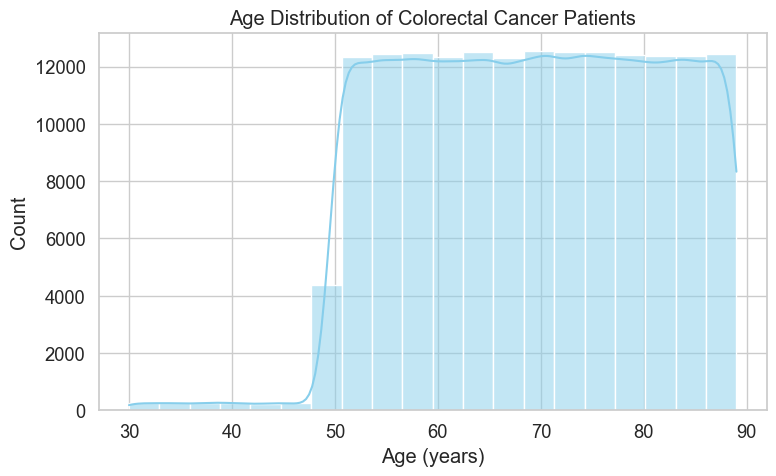

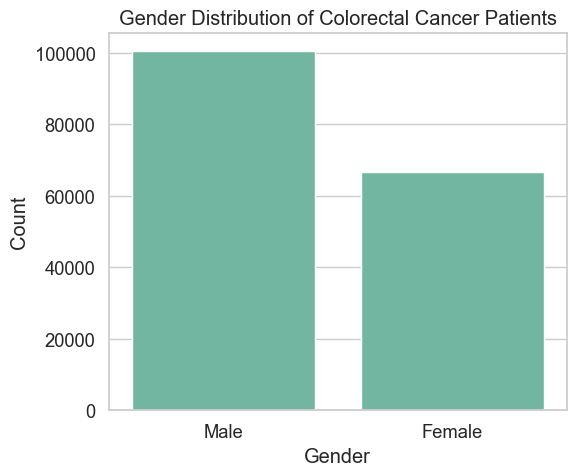

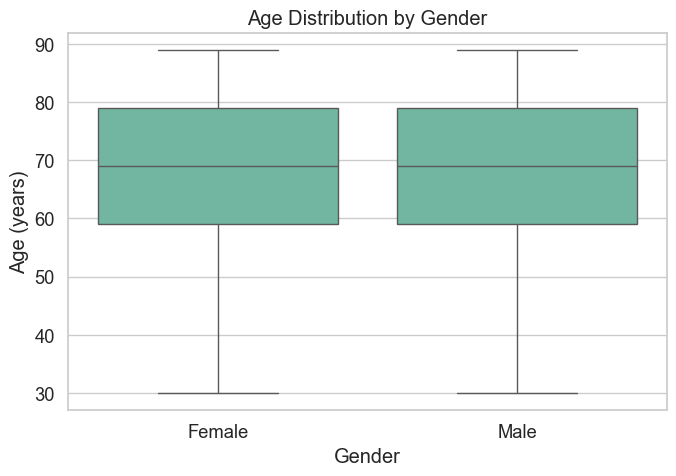

Gender Distribution
Male: 100686 patients (60.1%)
Female: 66811 patients (39.9%)

Age Descriptive Statistics (Overall)
count    167497.00000
mean         69.20078
std          11.87247
min          30.00000
25%          59.00000
50%          69.00000
75%          79.00000
max          89.00000
Name: Age, dtype: float64

Age Descriptive Statistics by Gender
           count       mean        std   min   25%   50%   75%   max
Gender                                                              
Female   66811.0  69.210370  11.893821  30.0  59.0  69.0  79.0  89.0
Male    100686.0  69.194416  11.858336  30.0  59.0  69.0  79.0  89.0


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_58293/4193841898.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(gender_col)[age_col].describe())


In [11]:
age_col = "Age"
gender_col = "Gender"

# Clean and normalize data
df[age_col] = pd.to_numeric(df[age_col], errors="coerce")
df.loc[(df[age_col] < 0) | (df[age_col] > 120), age_col] = pd.NA

def normalize_gender(x):
    if pd.isna(x): return "Unknown"
    s = str(x).strip().lower()
    if s in {"m","male","man"}: return "Male"
    if s in {"f","female","woman"}: return "Female"
    return "Other/Unknown"

df[gender_col] = df[gender_col].apply(normalize_gender)

# Seaborn
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1. Age distribution (histogram with kernel density)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=age_col, bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Colorectal Cancer Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Gender distribution (bar chart)
plt.figure(figsize=(6,5))
sns.countplot(data=df, x=gender_col, order=df[gender_col].value_counts().index)
plt.title("Gender Distribution of Colorectal Cancer Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Age distribution by gender (boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x=gender_col, y=age_col)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()

#Text outputs
print("Gender Distribution")
gender_counts = df[gender_col].value_counts(dropna=False)
gender_pct = df[gender_col].value_counts(normalize=True, dropna=False) * 100
for g in gender_counts.index:
    print(f"{g}: {gender_counts[g]} patients ({gender_pct[g]:.1f}%)")

print("\nAge Descriptive Statistics (Overall)")
print(df[age_col].describe())

print("\nAge Descriptive Statistics by Gender")
print(df.groupby(gender_col)[age_col].describe())

The patient population is largely male (60.1%) with females accounting for 39.9%. Patients are overall from the older population (median = 69 years; IQR = 59–79), with ages spanning 30–89 and a mean of approximately 69.2 (SD ≈ 11.9). Age profiles are essentially identical by gender (means and spread nearly the same), suggesting no major age-based imbalance between men and women. For our project, this confirms age as a key predictor to retain (and to display prominently in the dashboard), while gender may not contribute to predicitve analysis, but is still useful for comparative analysis.

#### **2. What is the distribution of cancer stages among patients?**

Cancer Cancer_Stage Distribution
REGIONAL: 66981 patients (40.0%)
LOCALIZED: 66799 patients (39.9%)
METASTATIC: 33717 patients (20.1%)


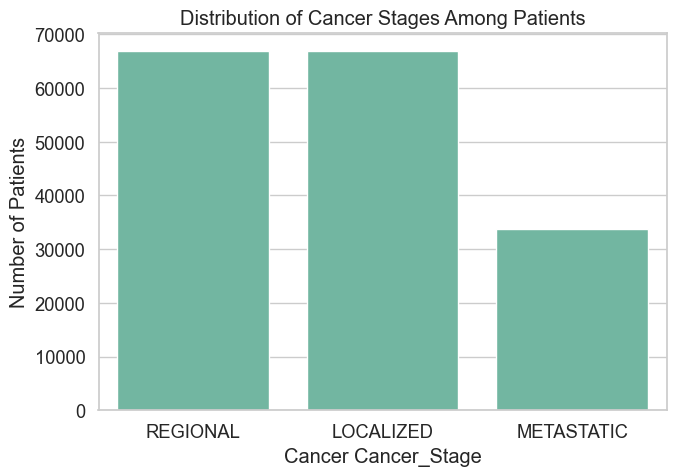

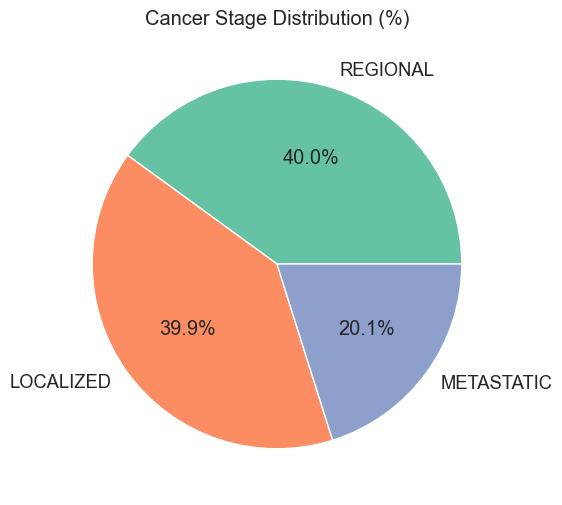

In [12]:
Cancer_Stage = "Cancer_Stage"

# Clean stage values
df[Cancer_Stage] = df[Cancer_Stage].astype(str).str.strip().str.upper()

# Summary table
stage_counts = df[Cancer_Stage].value_counts(dropna=False)
stage_pct = df[Cancer_Stage].value_counts(normalize=True, dropna=False) * 100

print("Cancer Cancer_Stage Distribution")
for s in stage_counts.index:
    print(f"{s}: {stage_counts[s]} patients ({stage_pct[s]:.1f}%)")

# Seaborn style settings
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Bar chart
plt.figure(figsize=(7,5))
sns.countplot(data=df, x=Cancer_Stage, order=stage_counts.index)
plt.title("Distribution of Cancer Stages Among Patients")
plt.xlabel("Cancer Cancer_Stage")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("Set2", n_colors=len(stage_counts)))
plt.title("Cancer Stage Distribution (%)")
plt.show()

The distribution of cancer stages in the dataset shows that most patients are either in the localized stage (39.9%) or the regional stage (40.0%), while a smaller proportion, 20.1%, are diagnosed at the metastatic stage. This indicates that the dataset captures a broad spectrum of disease progression, though advanced metastatic cases are less common. From a clinical perspective, survival chances are expected to decrease as stage advances, making stage a relevant feature to further explore in a predictive model.  

#### **3. How does survivability vary across cancer stages?**

Survivability (Proportion Survived 5 Years) by Stage ===
Cancer_Stage
LOCALIZED     60.0
METASTATIC    59.8
REGIONAL      60.0
Name: Survival_5_years, dtype: float64


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_58293/4024830895.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


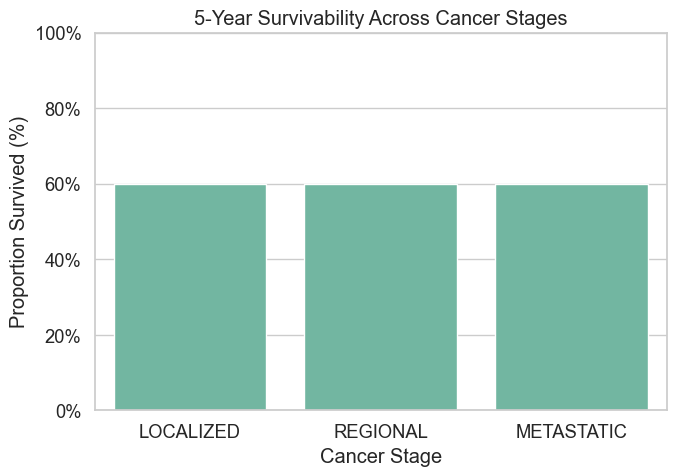

In [13]:
Cancer_Stage = "Cancer_Stage"
Survival_5_years = "Survival_5_years"

# Clean stage values
df[Cancer_Stage] = df[Cancer_Stage].astype(str).str.strip().str.upper()

# Convert survival to binary (1 = Yes, 0 = No)
df[Survival_5_years] = df[Survival_5_years].astype(str).str.strip().str.lower()
df[Survival_5_years] = df[Survival_5_years].map({"yes": 1, "no": 0})

# Drop missing values
df_clean = df.dropna(subset=[Cancer_Stage, Survival_5_years])

# Summary statistics
print("Survivability (Proportion Survived 5 Years) by Stage ===")
survival_rates = df_clean.groupby(Cancer_Stage)[Survival_5_years].mean().round(3) * 100
print(survival_rates)

# Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Bar plot of survivability by stage
plt.figure(figsize=(7,5))
sns.barplot(data=df_clean, x=Cancer_Stage, y=Survival_5_years, estimator="mean", errorbar=None)
plt.title("5-Year Survivability Across Cancer Stages")
plt.xlabel("Cancer Stage")
plt.ylabel("Proportion Survived (%)")
plt.gca().set_ylim(0,1)  # scale to 0–100%
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

In this synthetic dataset the survival rate across the different cancer stages is almost identical. This does not mirror the actual real world outcomes according to recent reserach and is probably an effect of the computer-generated data. Unfortunately this implies that cancer stage might not be a contributing feature to include in a predictive model.

#### **4. Among patients who did not survive past 5 years, how many had a history of smoking?**

Dtypes: {'Survival_5_years': dtype('int64'), 'Smoking_History': CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)}

Survival overall:
Survival_5_years
'1'    100387
'0'     67110
Name: count, dtype: int64

Smoking overall:
Smoking_History
'No'     100141
'Yes'     67356
Name: count, dtype: int64

Detected fatalities (Survival_5_years = No/0): 67110

Among patients who did not survive past 5 years (N=67110):
- Smokers: 26935 (40.1%)
- Non-smokers: 40175 (59.9%)


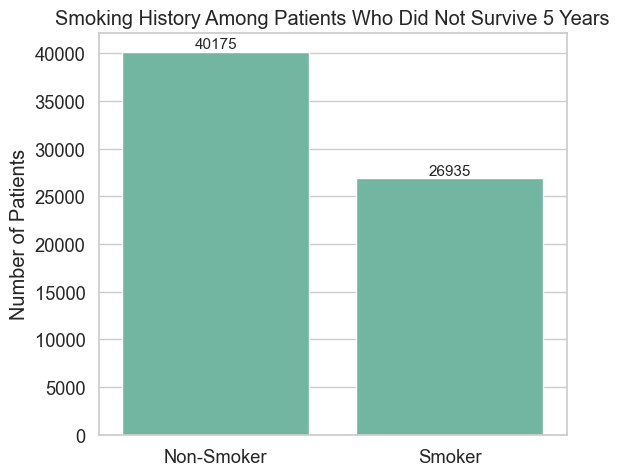

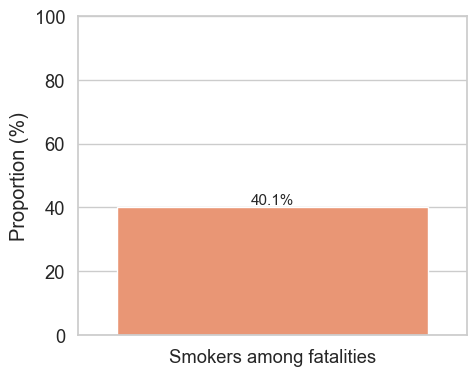

In [23]:
survival_col = "Survival_5_years"
smoking_col  = "Smoking_History"

# Diagnostics: see dtype and overall values
print("Dtypes:", dict(df[[survival_col, smoking_col]].dtypes))
print("\nSurvival overall:")
print(df[survival_col].astype(str).map(repr).value_counts().head(10))
print("\nSmoking overall:")
print(df[smoking_col].astype(str).map(repr).value_counts().head(10))

# fatalities mask that handles both numeric and string encodings
s_surv_str = df[survival_col].astype(str).str.strip().str.lower()
s_surv_num = pd.to_numeric(df[survival_col], errors="coerce")

# "No" encodings we accept as fatalities
fatal_is_no_str = s_surv_str.isin({"no", "0"})
fatal_is_zero   = s_surv_num.eq(0)

fatalities_mask = fatal_is_no_str | fatal_is_zero

total_fatal = int(fatalities_mask.sum())
print("\nDetected fatalities (Survival_5_years = No/0):", total_fatal)

if total_fatal == 0:
    print("No fatalities matched.")
else:
    # Normalize smoking to 0/1 for counting
    s_smok_str = df[smoking_col].astype(str).str.strip().str.lower()
    s_smok_num = pd.to_numeric(df[smoking_col], errors="coerce")

    smok_yes = s_smok_str.isin({"yes", "1", "true"})
    smok_one = s_smok_num.eq(1)

    smok_bin = np.where(smok_yes | smok_one, 1,
                        np.where(s_smok_str.isin({"no","0","false"}) | s_smok_num.eq(0), 0, np.nan))

    # Subset fatalities with valid smoking
    fatalities_idx = fatalities_mask & ~pd.isna(smok_bin)
    total_fatal_valid = int(fatalities_idx.sum())

    if total_fatal_valid == 0:
        print("Fatalities exist, but none have usable Smoking_History values.")
    else:
        count_smokers = int(smok_bin[fatalities_idx].sum())
        count_non     = total_fatal_valid - count_smokers
        prop_smokers  = (count_smokers / total_fatal_valid) * 100

        print(f"\nAmong patients who did not survive past 5 years (N={total_fatal_valid}):")
        print(f"- Smokers: {count_smokers} ({prop_smokers:.1f}%)")
        print(f"- Non-smokers: {count_non} ({100 - prop_smokers:.1f}%)")

        # Visuals (Seaborn professional style)
        sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

        # Counts bar
        plt.figure(figsize=(6,5))
        ax = sns.barplot(x=["Non-Smoker","Smoker"], y=[count_non, count_smokers], errorbar=None)
        ax.set_title("Smoking History Among Patients Who Did Not Survive 5 Years")
        ax.set_ylabel("Number of Patients")
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",
                        (p.get_x()+p.get_width()/2, p.get_height()),
                        ha="center", va="bottom", fontsize=11)
        plt.tight_layout()
        plt.show()

        # Percentage bar
        plt.figure(figsize=(5,4))
        ax = sns.barplot(x=["Smokers among fatalities"], y=[prop_smokers], errorbar=None,
                         color=sns.color_palette("Set2")[1])
        ax.set_ylim(0,100)
        ax.set_ylabel("Proportion (%)")
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}%",
                        (p.get_x()+p.get_width()/2, p.get_height()),
                        ha="center", va="bottom", fontsize=11)
        plt.tight_layout()
        plt.show()

In [24]:
smoking_col = "Smoking_History"

# Convert to string and normalize
s_smok = df[smoking_col].astype(str).str.strip().str.lower()

# Map Yes/No → 1/0
smok_bin = s_smok.map({"yes": 1, "no": 0})

# Drop missing
valid = smok_bin.dropna()

# Counts & percentages
counts = valid.value_counts().rename({0: "Non-smoker", 1: "Smoker"})
percentages = (counts / counts.sum() * 100).round(1)

print("Overall smoking distribution:")
for group in counts.index:
    print(f"- {group}: {counts[group]} ({percentages[group]}%)")

Overall smoking distribution:
- Non-smoker: 100141 (59.8%)
- Smoker: 67356 (40.2%)


40% of patients who did not survive past 5 years aftger diagnosis had a history of smoking. But, it is important to consider that 60% of the entire dataset population were non smokers.

#### **5. How does the average tumor size vary across cancer stages?**

Average tumor size by cancer stage:


,Cancer_Stage,count,mean,median,std
0,LOCALIZED,66799,42.059552,42.0,21.697817
1,METASTATIC,33717,41.824451,42.0,21.686513
2,REGIONAL,66981,42.043251,42.0,21.639263


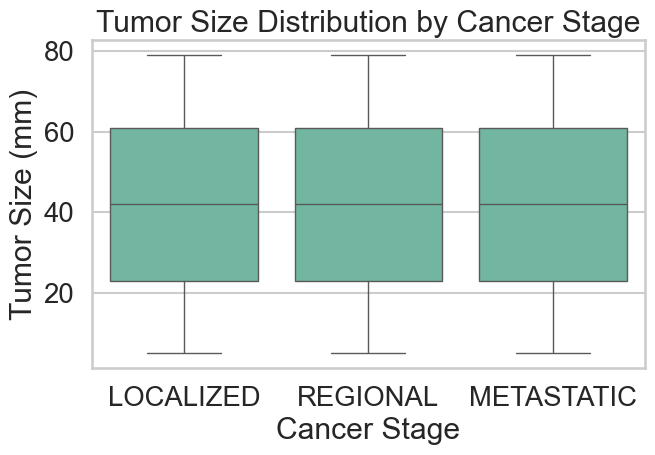

In [31]:
tumor_col = "Tumor_Size_mm"       # numeric
stage_col = "Cancer_Stage"     # categorical: localized, regional, metastatic

# Summary table
summary = (
    df.groupby(stage_col)[tumor_col]
      .agg(['count','mean','median','std'])
      .reset_index()
)
print("Average tumor size by cancer stage:")
display(summary)

# Complementary boxplot to show spread
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x=stage_col, y=tumor_col
)
plt.title("Tumor Size Distribution by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (mm)")
plt.tight_layout()
plt.show()

The average tumor size across the different cancer stages was as good as identical, again probably since this is a synthetic dataset.

#### **6. What proportion of patients had prior screening?**

Proportion of patients with prior screening (overall):
- Prior screening: 133965/167497 (80.0%)
- No prior screening: 33532/167497 (20.0%)

Screening_History distribution (counts and %):
                   count  percent
Screening_History                
REGULAR            67149     40.1
IRREGULAR          66816     39.9
NEVER              33532     20.0


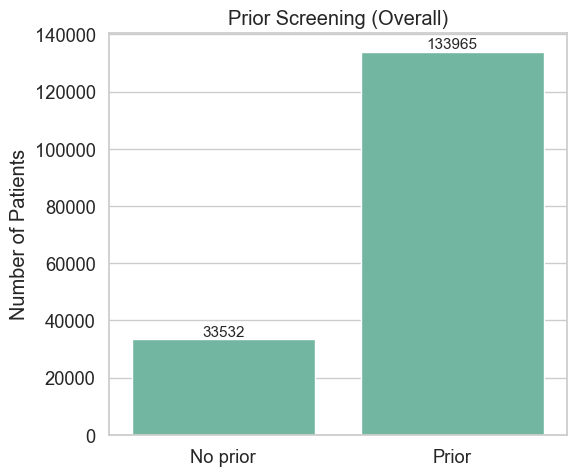

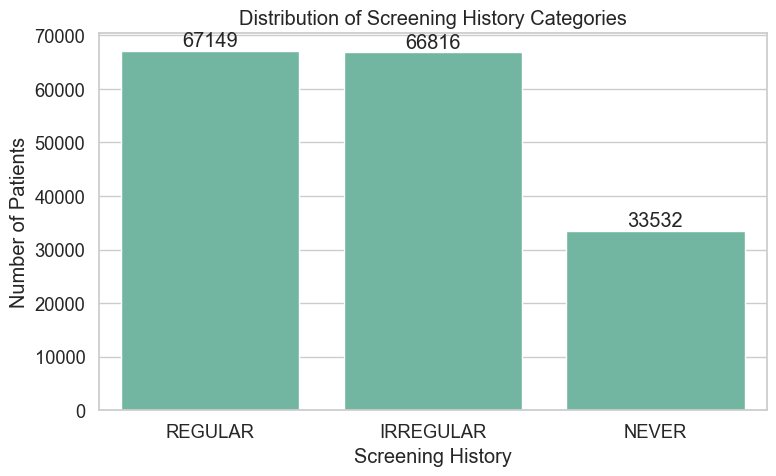

In [32]:
screening_col = "Screening_History"

s = df[screening_col].astype(str).str.strip().str.upper()

# Map to "prior screening" = 1 if screened at least once, 0 if never screened
# Handles common encodings:
#   Prior screening: YES / REGULAR / IRREGULAR / EVER / 1 / TRUE
#   No prior screening: NO / NEVER / 0 / FALSE
prior_yes = {"YES", "REGULAR", "IRREGULAR", "EVER", "SCREENED", "1", "TRUE"}
prior_no  = {"NO", "NEVER", "0", "FALSE"}

prior_bin = np.where(s.isin(prior_yes), 1, np.where(s.isin(prior_no), 0, np.nan))
prior_series = pd.Series(prior_bin, name="Prior_Screening")

# Drop missing after mapping
valid = ~pd.isna(prior_series)
df_screen = pd.DataFrame({
    "Prior_Screening": prior_series[valid].astype(int),
    screening_col: s[valid]
})

# Proportions (overall)
prop_prior = df_screen["Prior_Screening"].mean() * 100
count_prior = int(df_screen["Prior_Screening"].sum())
total = len(df_screen)
count_no = total - count_prior
prop_no = 100 - prop_prior

print("Proportion of patients with prior screening (overall):")
print(f"- Prior screening: {count_prior}/{total} ({prop_prior:.1f}%)")
print(f"- No prior screening: {count_no}/{total} ({prop_no:.1f}%)\n")

# Detailed distribution of raw Screening_History values (for transparency)
cat_counts = df_screen[screening_col].value_counts(dropna=False)
cat_pct = (cat_counts / cat_counts.sum() * 100).round(1)
print("Screening_History distribution (counts and %):")
print(pd.DataFrame({"count": cat_counts, "percent": cat_pct}))

# ===== Visualizations (Seaborn professional style) =====
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1) Bar chart: Prior vs No Prior (counts)
plt.figure(figsize=(6,5))
ax = sns.barplot(
    x=["No prior", "Prior"],
    y=[count_no, count_prior],
    errorbar=None
)
ax.set_title("Prior Screening (Overall)")
ax.set_ylabel("Number of Patients")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11)
plt.tight_layout()
plt.show()

# 2) Bar chart: Distribution of Screening_History categories
plt.figure(figsize=(8,5))
order = cat_counts.index.tolist()
ax = sns.countplot(data=df_screen, x=screening_col, order=order)
ax.set_title("Distribution of Screening History Categories")
ax.set_xlabel("Screening History")
ax.set_ylabel("Number of Patients")
for c in ax.containers:
    ax.bar_label(c, fmt="%d")
plt.tight_layout()
plt.show()

Majority of patients had prior screening. Regular and irregular screenings were equally common.

#### 

#### **7. What is the frequency of the different treatment types?**

Frequency of Treatment Types:
- SURGERY: 66934 patients (40.0%)
- CHEMOTHERAPY: 50443 patients (30.1%)
- COMBINATION: 33276 patients (19.9%)
- RADIOTHERAPY: 16844 patients (10.1%)


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_58293/239898926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


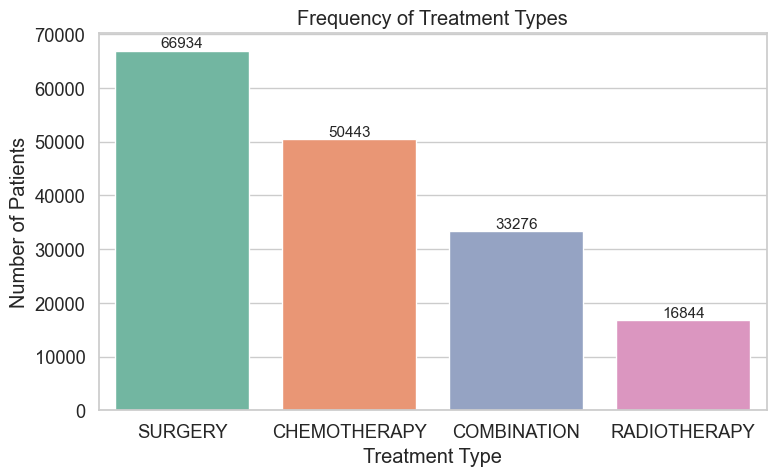

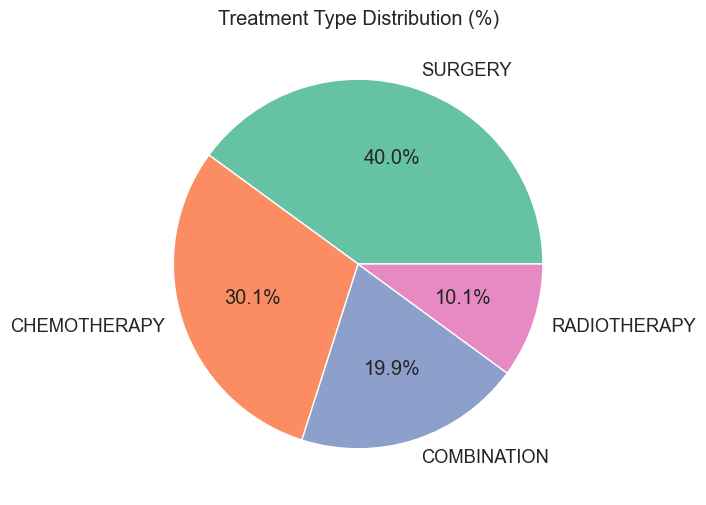

In [34]:
treat_col = "Treatment_Type"

# Clean values (remove whitespace, normalize case)
df[treat_col] = df[treat_col].astype(str).str.strip().str.upper()

# Frequency counts
treat_counts = df[treat_col].value_counts()
treat_pct = (treat_counts / treat_counts.sum() * 100).round(1)

print("Frequency of Treatment Types:")
for t, c in treat_counts.items():
    print(f"- {t}: {c} patients ({treat_pct[t]}%)")

# Visualization
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1) Bar chart (counts)
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=treat_counts.index,
    y=treat_counts.values,
    palette="Set2"
)
ax.set_title("Frequency of Treatment Types")
ax.set_xlabel("Treatment Type")
ax.set_ylabel("Number of Patients")
for p, count in zip(ax.patches, treat_counts.values):
    ax.annotate(f"{count}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11)
plt.tight_layout()
plt.show()

# 2) Pie chart (percentages)
plt.figure(figsize=(6,6))
plt.pie(
    treat_counts.values,
    labels=treat_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2", n_colors=len(treat_counts))
)
plt.title("Treatment Type Distribution (%)")
plt.show()

Surgery was the most common treatment type, followed by, chemotherapy, combination treatment and lastly readiotherapy.

---

### Example of a simple pre-trained model from Scikit-learn

Training a logistic regression here, that can be loaded to make predictions on user input on the web dashboard.

Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html


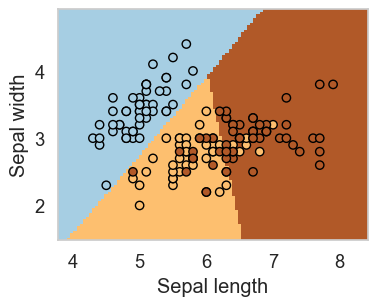

In [15]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

## Exporting a pretrained model

In the dashboard, you should load a pre-trained model that was designed and evaluated in the jupyter notebook. You can do it with `pickle` or any alternative for the same purpose.

In [16]:
import pickle

In [17]:
# Save in the `assets` folder so that it is accessible from the web dashboard
file_path = "../assets/trained_model.pickle"
data_to_save = logreg

# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

In [18]:
# Load model
pre_trained_model_path = "../assets/trained_model.pickle"
loaded_model = None # This will be replaced by the trained model in the pickle 

with open(pre_trained_model_path, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [19]:
loaded_model

LogisticRegression(C=100000.0)

In [20]:
# Sepal [length, width]
user_data = [[5, 4]] # Must be 2D array
prediction = loaded_model.predict(user_data)

print(f"The predicted value for data {user_data} is {prediction}")

The predicted value for data [[5, 4]] is [0]
